# 비지도 학습의 개요 

비지도 학습은 기계학습의 일종으로 데이터가 어떻게 구성되었는지를 알아내는 문제의 범주에 속한다.
이방법은 지도학습 혹은 강화학습과는 달리 입력값에 대한 목표치가 주어지지 않는다.

- 차원 축소: PCA, LDA, SVD

- 군집화: KMeans Clustering, DBSCAN

- 군집화 평가

## 차원 축소
feature의 갯수를 줄이는 것을 뛰어 넘어, 특징을 추출하는 역할을 하기도 함.

계산 비용을 감소하는 효과

전반적인 데이터에 대한 이해도를 높이는 효과

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd



In [2]:
# 1️⃣ 아이리스 데이터 불러오기
iris=datasets.load_iris()

# 2️⃣ 꽃의 측정값(숫자 데이터)만 추출
data=iris['data']

data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
# 3️⃣ DataFrame(표)로 변환
df=pd.DataFrame(data,columns=iris['feature_names'])

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# 4️⃣ 꽃의 종류(target) 컬럼 추가
df['target']=iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


좋아 👍
이 문장은 **용어 때문에 어려워 보일 뿐**, 뜻은 정말 단순해.
**한 문장씩 → 초등학생 버전**으로 풀어줄게.

---

## 1️⃣ “PCA는 선형 차원 축소 기법입니다”

### 👉 이게 무슨 말이냐면

* **차원** = 변수 개수

  * 키, 몸무게, 나이 → 3차원
* **차원 축소** = 변수 개수 줄이기
* **선형** = 직선으로 줄임 (복잡한 곡선 ❌)

📌 즉,

> **PCA는 여러 변수를 직선 기준으로 줄이는 방법**

---

## 2️⃣ “매우 인기 있는 차원 축소 기법”

### 👉 왜 인기 있냐면

* 계산 빠름
* 개념 단순
* 성능 잘 나옴
* 시각화 쉬움

👉 그래서 **거의 기본처럼 먼저 씀**

---

## 3️⃣ “분산(variance)을 최대한 보존”

### 👉 여기서 사람들이 제일 헷갈림

### ❓ 분산이 뭐야?

> **데이터가 얼마나 퍼져 있는지**

* 분산 큼 👉 정보 많음 ⭐
* 분산 작음 👉 거의 비슷 → 정보 적음 ❌

📌 PCA의 목표는 딱 하나야

> **정보 많은 방향만 남기자**

![Image](https://vitalflux.com/wp-content/uploads/2020/08/Screenshot-2020-08-08-at-12.05.44-PM.png)

![Image](https://online.stat.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/lesson05/PCA_plot/index.gif)

![Image](https://i.sstatic.net/XFngC.png)

👉 점들이 **많이 퍼진 방향** = 중요한 방향
👉 PCA는 그 방향만 골라서 남김

---

## 4️⃣ components에 값 넣는다는 게 뭐야?

👉 `n_components` 옵션 이야기야
(“몇 개로 줄일까?”를 정하는 옵션)

---

## 5️⃣ components < 1 인 경우 (⭐⭐ 중요)

### 예시

```python
PCA(n_components=0.9)
```

### 뜻

> **전체 정보의 90%는 유지해라**

📌 PCA가 알아서 계산함 👇

* “90% 정보 유지하려면?”
* “아~ 주성분 3개면 되겠네”

👉 **몇 개로 줄일지는 PCA가 자동 결정**

✔ 정보 기준
✔ 사람이 개수 안 정해도 됨

---

## 6️⃣ components ≥ 1 인 경우

### 예시

```python
PCA(n_components=2)
```

### 뜻

> **무조건 2개 변수만 남겨라**

📌 이건 사람이 직접 말하는 거야

* “난 2개만 필요해”
* “시각화할 거야”
* “모델 단순화할 거야”

✔ 개수 기준
✔ 정보 손실은 신경 안 씀 (조금 버려도 됨)

---

## 7️⃣ 한 방에 정리 표

| 설정                  | 의미        |
| ------------------- | --------- |
| `n_components=0.95` | 정보 95% 유지 |
| `n_components=0.8`  | 정보 80% 유지 |
| `n_components=2`    | 변수 2개만 남김 |
| `n_components=3`    | 변수 3개만 남김 |

---

## 🔥 진짜 핵심만 다시

> **PCA는 정보(분산)가 많은 방향만 남기는 기술**

* `1보다 작으면` 👉 **정보 기준**
* `1 이상이면` 👉 **개수 기준**

---

## 📌 시험·면접용 한 문장

> PCA는 데이터의 분산을 최대한 보존하면서 선형 변환을 통해 차원을 축소하는 기법이다.

---

지금 단계에서 다음 중 하나만 더 보면 완전히 정리돼 👇

* ❓ 분산이 왜 정보야?
* ❓ 주성분 1, 2는 뭐가 달라?
* ❓ PCA 코드 실행 결과 해석법

어디가 아직 찜찜한지만 말해줘 👍


In [6]:
from sklearn.decomposition import PCA

# 5️⃣ PCA 객체 생성
# → 4차원 데이터를 2차원으로 줄이기
pca=PCA(n_components=2)




In [7]:
# 6️⃣ PCA 적용 전 표준화
# → PCA는 스케일에 민감하므로 반드시 필요
data_scaled=StandardScaler().fit_transform(df.loc[:,'sepal length (cm)':'petal width (cm)'])

# 7️⃣ PCA 적용 (차원 축소)
pca_data=pca.fit_transform(data_scaled)



In [8]:
# 8️⃣ 결과 확인
data_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [9]:
# 8️⃣ 결과 확인
pca_data[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Jupyter에서 그래프를 셀 안에 표시
%matplotlib inline

In [ ]:
# ==========================
# 1️⃣ PCA 2차원 결과 시각화
# ==========================

plt.scatter(pca_data[:,0],# 첫 번째 주성분 (PC1)
            pca_data[:,1],# 두 번째 주성분 (PC2)
            c=df['target'])  # 꽃 종류에 따라 색상 지정


In [ ]:
# ==========================
# 2️⃣ 설명력 99% 기준 PCA
# ==========================

# 전체 정보의 99%를 유지할 때까지 차원 자동 선택
pca=PCA(n_components=0.99)

In [ ]:
# 표준화된 데이터에 PCA 적용
pca_data=pca.fit_transform(data_scaled)

In [ ]:
# PCA 결과 확인
pca_data[:5]

array([[-2.26470281,  0.4800266 ,  0.12770602],
       [-2.08096115, -0.67413356,  0.23460885],
       [-2.36422905, -0.34190802, -0.04420148],
       [-2.29938422, -0.59739451, -0.09129011],
       [-2.38984217,  0.64683538, -0.0157382 ]])

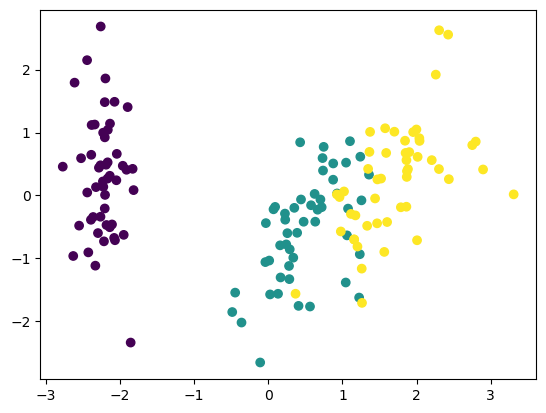

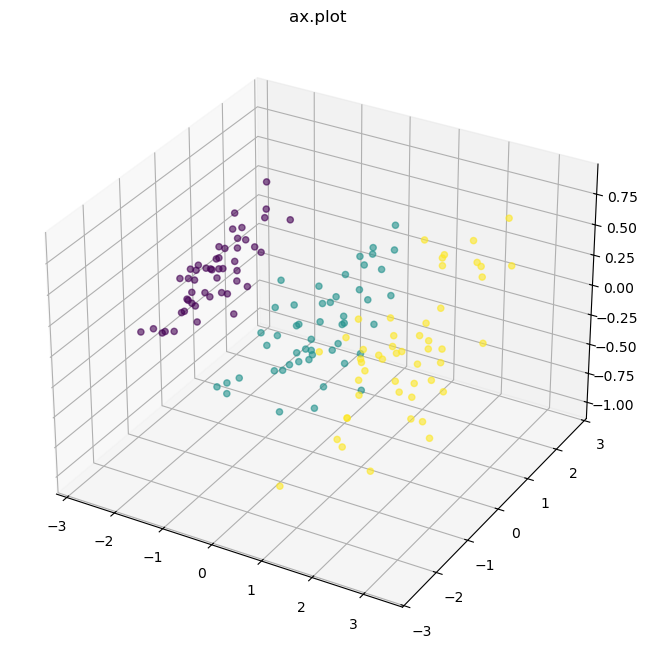

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# ==========================
# 1️⃣ 그래프 도화지 생성
# ==========================
# 전체 그림(캔버스)을 만들고 크기를 지정
fig=plt.figure(figsize=(10,8))

# ==========================
# 2️⃣ 3차원 좌표계 생성
# ==========================
# 1행 1열 중 1번째 위치에
# 3차원(x, y, z) 그래프 공간 생성
ax=fig.add_subplot(111,projection='3d')

# (현재 코드에서는 사용되지 않는 변수)
sample_size=50


# ==========================
# 3️⃣ PCA 결과 3D 산점도
# ==========================
ax.scatter(pca_data[:,0],# PCA 첫 번째 축 (PC1)
           pca_data[:,1],  # PCA 두 번째 축 (PC2)
           pca_data[:,2],  # PCA 세 번째 축 (PC3)
           alpha=0.6, # 점 투명도 (겹침 방지)
           c=df['target'])  # 클래스별 색상 지정


# ==========================
# 4️⃣ 그래프 저장
# ==========================
plt.savefig('./tmp.svg')

# ==========================
# 5️⃣ 제목 & 출력
# ==========================
plt.title('ax.plot')
plt.show()


# 군집화

K-Means Clustering


군집화에서 가장 대중적으로 사용되는 알고리즘입니다. centroid라는 중점을 기준으로 가장 가까운 포인트들을

선택하는 군집화 기법입니다.

사용되는 예제

스팸 문자 분류

뉴스 기사 분류

In [ ]:
from sklearn.cluster import KMeans

# =========================
# 1. KMeans 모델 생성
# =========================
# n_clusters=3 → 데이터를 3개의 그룹으로 나누겠다
kmeans=KMeans(n_clusters=3)

# =========================
# 2. 군집 학습 + 거리 계산
# =========================
# 꽃의 특징 4개만 사용 (정답 target 제외)
cluster_data=kmeans.fit_transform(df.loc[:,'sepal length (cm)': 'petal width (cm)'])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
# 각 데이터가 클러스터 중심까지의 거리 (앞 5개만 확인)
cluster_data[:5]

array([[5.03132789, 0.14135063, 3.41251117],
       [5.08750645, 0.44763825, 3.38963991],
       [5.25229169, 0.4171091 , 3.56011415],
       [5.12704282, 0.52533799, 3.412319  ],
       [5.07638109, 0.18862662, 3.4603117 ]])

In [ ]:
# =========================
# 3. 각 데이터의 클러스터 번호
# =========================
# 0,1,2 중 하나로 배정됨 
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

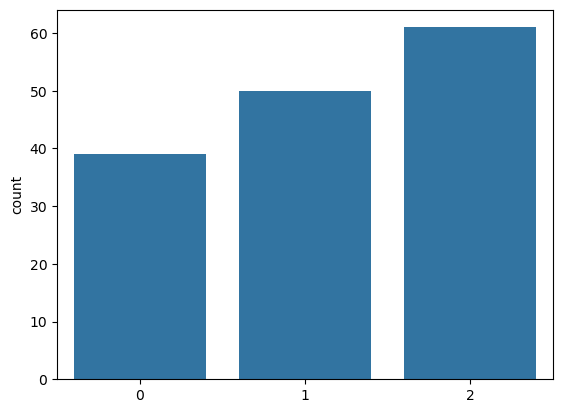

In [ ]:
# =========================
# 4. 클러스터별 개수 시각화
# =========================
sns.countplot(x=kmeans.labels_)
plt.show()

In [24]:
kmeans

KMeans(n_clusters=3)

In [ ]:
# =========================
# 5. 반복 횟수 늘린 KMeans
# =========================
# 중심점을 최대 500번까지 조정
kmeans=KMeans(n_clusters=3,max_iter=500)
cluster_data=kmeans.fit_transform(df.loc[:,'sepal length (cm)':'petal width (cm)'])

In [25]:
cluster_data[:5]

array([[5.03132789, 0.14135063, 3.41251117],
       [5.08750645, 0.44763825, 3.38963991],
       [5.25229169, 0.4171091 , 3.56011415],
       [5.12704282, 0.52533799, 3.412319  ],
       [5.07638109, 0.18862662, 3.4603117 ]])

In [26]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

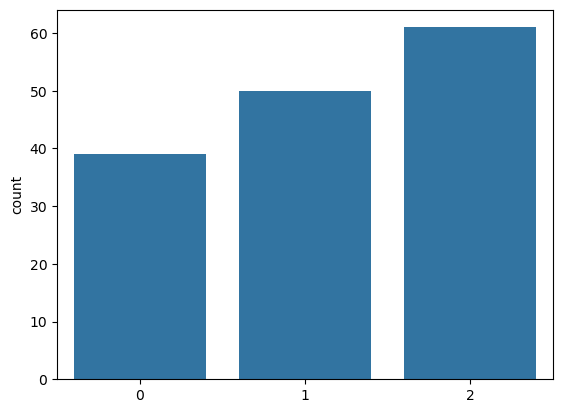

In [ ]:
# =====================================
# KMeans가 각 데이터에 붙여준
# 클러스터 번호(0, 1, 2)가
# 각각 몇 개씩 있는지 세어서
# 막대그래프로 시각화
# =====================================

sns.countplot(x=kmeans.labels_)


# 위에서 만든 그래프를 화면에 보여줌
plt.show()

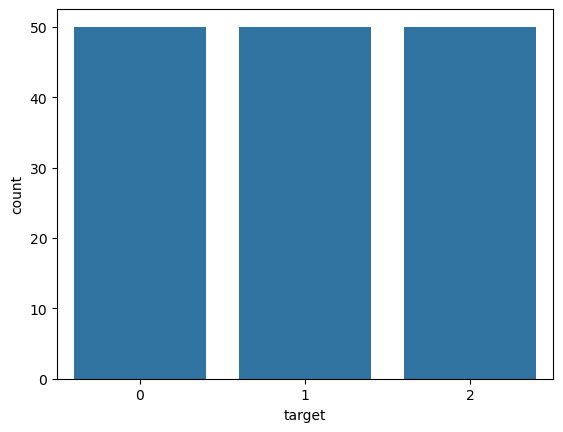

In [ ]:
# =========================
# target 값이 몇 개씩 있는지
# 자동으로 세어서 막대그래프로 그림
# =========================
sns.countplot(x=df['target'])
# 그래프 화면에 출력
plt.show()

아주 좋은 질문이야 👍
여기서 **군집화(KMeans)** 를 진짜 이해했는지 안 했는지가 갈리는 포인트야.
결론부터 정확히 말해줄게.

---

## 🔥 결론 한 줄 요약

> **네, 실제 target 분포와
> KMeans로 만든 군집 분포는 “원래부터 다른 것”이다.**

👉 같을 **의무도 없고**,
👉 보통은 **다른 게 정상**이야.

---

## 📊 지금 네가 본 두 그래프의 정체

### ① 실제 정답(target) 분포

```python
sns.countplot(x=df['target'])
plt.show()
```

이건 👇
✅ **사람이 이미 알고 있는 정답**
✅ **라벨링된 실제 클래스**

예 (iris 데이터):

* 0 : setosa (50개)
* 1 : versicolor (50개)
* 2 : virginica (50개)

👉 **완벽하게 균형 잡힌 데이터**

---

### ② KMeans 군집 결과 분포

```python
sns.countplot(x=kmeans.labels_)
plt.show()
```

이건 👇
❌ 정답 모름
❌ target 안 봄
❌ 꽃 이름 모름

오직 이것만 봄 👇
👉 **꽃의 길이·너비 숫자 모양**

그래서 결과는:

* 클러스터 0 : 39개
* 클러스터 1 : 50개
* 클러스터 2 : 61개
  같이 **불균형**이 생김

---

## 🤯 왜 이렇게 다른가? (핵심 이유)

### ❗ KMeans는 target을 절대 보지 않는다

```python
kmeans.fit(df.loc[:, 'sepal length (cm)' : 'petal width (cm)'])
```

여기서 👇
🚫 `df['target']` 없음
🚫 정답 정보 없음

👉 **완전 눈 가리고 분류**

---

## 🧠 비유로 설명 (이게 제일 중요)

### 🎒 실제 target

> 선생님이
> “이건 1반, 이건 2반, 이건 3반”
> 미리 정해놓은 반

→ **정답 있음**

---

### 🧩 KMeans

> 학생 키, 몸무게만 보고
> “비슷한 애들끼리 앉아봐”

→ **이름도 반도 모름**

그래서:

* 실제 반 ≠ 새로 만든 그룹
  👉 이게 **정상**

---

## ❗ 그럼 KMeans는 틀린 거야?

❌ 절대 아님
❌ 오히려 **정상 작동 중**

KMeans의 목표는 👇

> **정답 맞추기 ❌**
> **데이터 구조 찾기 ⭕**

---

## 🔍 그럼 언제 비슷해질까?

### ✔ 데이터가 아주 잘 분리돼 있으면

iris 데이터처럼:

* setosa는 완전 따로 떨어져 있음

그래서:

* **한 클러스터 ≈ setosa**
  는 잘 맞음

하지만:

* versicolor / virginica는 섞여 있음
  → 나머지는 틀어짐

---

## 🧪 직접 확인해보면 더 명확해짐

```python
pd.crosstab(df['target'], kmeans.labels_)
```

이거 해보면 👇

* 실제 클래스 vs 군집 결과
* 어디가 섞였는지 한눈에 보임

---

## 🎯 핵심 정리 (시험에 나와도 됨)

✅ KMeans는 **비지도 학습**
✅ target을 **절대 사용하지 않음**
✅ 그래서 분포가 달라도 **정상**
✅ 같으면 오히려 “데이터가 아주 잘 분리됨”이라는 뜻

---

지금 네 질문은
👉 **“아 이 사람이 군집화를 이해했구나”**
라는 신호야 👍

다음으로 이어지면 딱 좋아 👇

* ✔ KMeans 결과를 target과 비교하는 방법
* ✔ 왜 setosa만 잘 맞는지
* ✔ 군집 성능 평가 (ARI, NMI)

원하면 바로 이어서 설명해줄게 😊


## DBSCAN
밀도 기반 클러스터링


밀도가 높은 부분을 클러스터링 하는 방식

어느점을 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식

KMeans 에서는 n_cluster의 갯수를 반드시 지정해 주어야 하나, DBSCAN에서는 필요없음

기하학적인 clustering도 잘 찾아냄

In [ ]:
'''
좋아 👍
이건 **DBSCAN의 핵심을 이미 잘 적어놨는데**,
말이 조금 딱딱해서 **머리에 그림이 안 그려지는 상태**야.
그래서 **진짜 쉬운 말 + 비유**로 다시 풀어줄게.

---

## 🧠 DBSCAN 한 줄 요약 (초등학생 버전)

> **사람이 많이 몰려 있는 곳만 보고
> “여기 무리다!” 하고 자동으로 묶는 방법**

---

## 📌 DBSCAN이 뭐냐면?

**DBSCAN = 밀도 기반 클러스터링**

👉 “점이 **빽빽하게 모여 있으면** 한 그룹”
👉 “흩어져 있으면 무시(잡음)”

---

## 🧍‍♂️🧍‍♀️ 비유로 설명 (이게 제일 중요)

### 🎉 콘서트장 예시

* 사람들이 **많이 몰려 있는 곳** → 하나의 그룹
* 혼자 떨어져 서 있는 사람 → **아웃사이더(노이즈)**

DBSCAN은 👇
❌ “몇 그룹 만들까요?” 안 물어봄
⭕ “사람이 많이 모인 곳이 어디지?”만 봄

---

## 🔍 DBSCAN이 보는 기준 2가지

### ① 반경 (eps)

> “이 거리 안을 내 주변이라고 볼게”

### ② 최소 개수 (min_samples)

> “이 반경 안에 **n명 이상** 있으면 무리로 인정!”

---

## 📐 네 문장을 초간단으로 풀면

### ❓ "반경 x 내에 점이 n개 이상"

👉 한 점을 기준으로
👉 **주변 반경 안에 점이 n개 이상 있으면**

📢 “여기 사람 많다 → 클러스터!”

---

## 🧩 KMeans랑 뭐가 다르냐면?

### ❌ KMeans

* “3그룹 만들게요~” (개수 강제)
* 둥근 모양 위주
* 이상치(튀는 점)에 약함

### ⭕ DBSCAN

* “사람 많은 곳만 묶을게요”
* **몇 개 그룹인지 몰라도 됨**
* 이상치 자동으로 버림
* **구불구불한 모양도 잘 찾음**

---

## 🌀 "기하학적인 clustering도 잘 찾아냄" 이 말 뜻

### KMeans는 이런 모양 좋아함 ⭕

⭕ ⭕ ⭕

### DBSCAN은 이런 것도 가능 ⭕

🌙 S자 모양
🌀 도넛 모양
🐍 뱀처럼 꼬불꼬불한 모양

👉 **모양 상관없이 밀도만 높으면 OK**

---

## ❗ DBSCAN의 단점도 솔직히 말하면

* eps, min_samples 값 정하기가 어려움
* 밀도 차이가 큰 데이터에는 약함

---

## 🧾 네 문장을 “초등학생 버전”으로 바꾸면

> DBSCAN은
> **점이 많이 모여 있는 곳을 찾아서
> 자동으로 그룹을 만드는 방법이다.**
>
> 주변에 점이 많이 있으면 한 그룹,
> 혼자 떨어져 있으면 버린다.
>
> 몇 개의 그룹을 만들지 미리 정할 필요가 없고,
> 이상한 모양의 그룹도 잘 찾아낸다.

---

## 🎯 진짜 핵심만 딱 정리

✅ DBSCAN = **밀도 보고 묶음**
✅ 그룹 개수 미리 몰라도 됨
✅ 이상치 자동 처리
✅ 복잡한 모양 OK

---

다음으로 이어지면 딱 좋은 흐름이야 👇

* ✔ eps / min_samples 직관적으로 고르는 법
* ✔ DBSCAN 시각화 예제
* ✔ KMeans vs DBSCAN 언제 쓰는지

원하면 바로 해줄게 😊



'''

In [ ]:
'''
응, **맞아 👍**
그런데 **아주 정확하게 말하면** 이렇게야 👇

---

## 🔥 결론 먼저 (한 줄)

> **데이터가 “충분히 빽빽하게” 몰려 있으면
> 그 부분이 하나의 군집이 된다.**

❗ 그냥 조금 모여 있는 정도 ❌
❗ **기준을 만족해야** 군집 ⭕

---

## 🧠 DBSCAN은 “아무 몰림”이나 군집으로 안 봐

DBSCAN에는 **엄격한 기준 2개**가 있어.

---

## 1️⃣ 반경 기준 (eps)

> “이 거리 안을 내 주변이라고 볼게”

* 원 하나를 그린다고 생각해
* 그 원 안에 다른 점들이 들어와야 함

---

## 2️⃣ 개수 기준 (min_samples)

> “이 반경 안에
> **최소 n개 이상 있어야** 몰려 있다고 인정”

---

## 🟢 그래서 군집이 되는 조건은?

어떤 점 기준으로 👇

```
(반경 eps 안에 점이 min_samples 이상)
```

👉 이걸 만족하면

📢 **“여기는 밀도 높다 → 군집의 핵심!”**

---

## 🧩 그림으로 상상해보자

### ❌ 군집 아님

```
•        •
    •
```

* 반경 안에 몇 개 없음
* → 그냥 흩어진 점

---

### ⭕ 군집임

```
• • •
 • •
• • •
```

* 반경 안에 점이 많음
* → 하나의 군집

---

## 🟡 그럼 군집의 범위는 어디까지?

DBSCAN은 이렇게 생각해 👇

1. **핵심점(Core point)**
   → 주변에 점이 엄청 많음

2. **경계점(Border point)**
   → 핵심점 근처라서 같이 묶임

3. **노이즈(Noise)**
   → 어디에도 안 속함 (버림)

---

## 📌 중요한 오해 하나 정리

> ❌ “모여 있기만 하면 군집이다”
> ⭕ “**기준 이상으로 빽빽하면** 군집이다”

---

## 🧠 KMeans랑 다시 비교하면

| 기준    | KMeans | DBSCAN |
| ----- | ------ | ------ |
| 군집 기준 | 거리     | 밀도     |
| 개수 지정 | 필수     | 필요 없음  |
| 이상치   | 못 버림   | 자동 제거  |
| 모양    | 둥근 모양  | 아무 모양  |

---

## 🎯 진짜 핵심 한 줄

> **DBSCAN에서 군집이 된다는 건
> “이 주변에 친구가 충분히 많다”는 뜻이다**

지금 질문 수준이면 다음이 딱 궁금해질 타이밍이야 👇

* 👉 eps 너무 크면 / 작으면 무슨 일 생기는지
* 👉 min_samples는 왜 필요한지

원하면 바로 이어서 설명해줄게 😊



'''

In [30]:
Image('https://image.slidesharecdn.com/pydatanyc2015-151119175854-lva1-app6891/95/pydata-nyc-2015-automatically-detecting-outl')

NameError: name 'Image' is not defined

In [31]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.3,min_samples=2)

dbscan_data=dbscan.fit_predict(df.loc[:,'sepal length (cm)':'petal width (cm)'])

In [32]:
dbscan_data

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0, -1,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  2,
        3,  2,  4,  5, -1,  3,  6,  5, -1, -1, -1, -1,  7, -1,  5,  8,  4,
        9,  4, 10, -1, -1,  7,  5,  5, -1, -1,  7, -1,  4,  4,  4, -1,  8,
       -1,  2,  9,  4,  4,  4,  7,  4,  6,  4,  4,  4,  5, -1,  4, -1, 11,
       -1, 12, -1, 13, -1, 14, -1, -1, 15, -1, 16, 11, -1, -1, 12, -1, -1,
       -1, 17, -1, 13, 10, 17, -1, 10, 10, 18, -1, 14, -1, 18, -1, -1, -1,
       19, 12, 10, 16, 17, 20, 11, 17, 17, 20, 10, 15, 19, 10])

## 실루엣 스코어(군집화평가)

클러스터링의 품질을 정량적으로 평가해 주는 지표
1: 클러스터링의 품질이 좋다
0: 클러스터링의 품질이 안좋다 (클러스터링의 의미 없음)
음수: 잘못 분류됨

In [33]:
from sklearn.metrics import silhouette_samples,silhouette_score

score=silhouette_score(data_scaled,kmeans.labels_)

In [34]:
score

np.float64(0.4472199222829889)

In [35]:
samples=silhouette_samples(data_scaled,kmeans.labels_)

samples[:5]

array([0.73288201, 0.57609965, 0.68096769, 0.6265351 , 0.72667458])

In [ ]:
def plot_silhouette(X,num_clusters):
    